In [33]:
import numpy as np
import scipy.stats
import pandas as pd

In [34]:
import matplotlib
import matplotlib.pyplot as pp

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

In [35]:
import re
import mailbox
import csv

In [6]:
gapminder = pd.read_csv('gapminder.csv')
gapminder

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000,28.21,53.142,7.00,603,1.650924
1,Afghanistan,1810,Asia,3280000,28.11,53.002,7.00,604,1.653662
2,Afghanistan,1820,Asia,3323519,28.01,52.862,7.00,604,1.653662
3,Afghanistan,1830,Asia,3448982,27.90,52.719,7.00,625,1.711157
4,Afghanistan,1840,Asia,3625022,27.80,52.576,7.00,647,1.771389
...,...,...,...,...,...,...,...,...,...
14735,Zimbabwe,2011,Africa,14255592,51.60,90.800,3.64,1626,4.451745
14736,Zimbabwe,2012,Africa,14565482,54.20,91.330,3.56,1750,4.791239
14737,Zimbabwe,2013,Africa,14898092,55.70,91.670,3.49,1773,4.854209
14738,Zimbabwe,2014,Africa,15245855,57.00,91.900,3.41,1773,4.854209


In [8]:
gapminder.loc[0:200:20]

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000,28.21,53.142,7.00,603,1.650924
20,Afghanistan,1955,Asia,8270024,29.27,60.193,7.67,1125,3.080082
40,Afghanistan,1975,Asia,12582954,39.61,72.060,7.67,1201,3.288159
60,Afghanistan,1995,Asia,16772522,49.40,84.770,7.83,872,2.387406
80,Afghanistan,2015,Asia,32526562,53.80,90.890,4.47,1925,5.270363
100,Albania,1954,Europe,1382881,56.59,84.829,6.31,2108,5.771389
120,Albania,1974,Europe,2358467,69.35,90.082,4.54,4177,11.436003
140,Albania,1994,Europe,3140634,73.60,96.540,2.77,3457,9.464750
160,Albania,2014,Europe,2889676,77.90,98.560,1.78,10160,27.816564
180,Algeria,1953,Africa,9405445,43.96,73.758,7.65,4077,11.162218


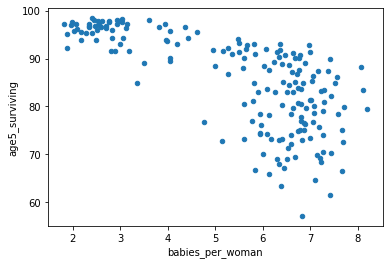

In [9]:
gapminder[gapminder.year == 1965].plot.scatter('babies_per_woman','age5_surviving')

In [12]:
def plotyear(year):
    data = gapminder[gapminder.year == year]
    area = 5e-6 * data.population
    colors = data.region.map({'Africa': 'skyblue', 'Europe': 'gold', 'America': 'palegreen', 'Asia': 'coral'})
    
    data.plot.scatter('babies_per_woman','age5_surviving',
                      s=area, c=colors, edgecolors='k',
                     figsize=(12,9))
    pp.axis(ymin=50,ymax=105,xmin=0,xmax=8)
    pp.xlabel('babies per woman')
    pp.ylabel('% children alive at 5')

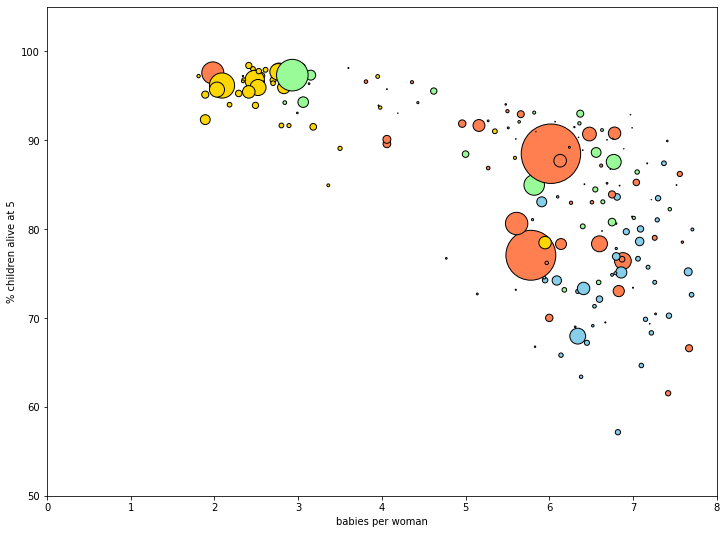

In [13]:
plotyear(1965)

In [14]:
interact(plotyear, year=widgets.IntSlider(min=1950, max=2015,step=1,value=1965))

interactive(children=(IntSlider(value=1965, description='year', max=2015, min=1950), Output()), _dom_classes=(…

<function __main__.plotyear(year)>

In [16]:
gapminder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14740 entries, 0 to 14739
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   country           14740 non-null  object 
 1   year              14740 non-null  int64  
 2   region            14740 non-null  object 
 3   population        14740 non-null  int64  
 4   life_expectancy   14740 non-null  float64
 5   age5_surviving    14740 non-null  float64
 6   babies_per_woman  14740 non-null  float64
 7   gdp_per_capita    14740 non-null  int64  
 8   gdp_per_day       14740 non-null  float64
dtypes: float64(4), int64(3), object(2)
memory usage: 1.0+ MB


In [17]:
# Time Series
italy = gapminder.query('country=="Italy"')

In [18]:
italy.head()

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
6397,Italy,1800,Europe,18822234,29.69,54.259,5.47,2225,6.091718
6398,Italy,1810,Europe,19491674,29.69,54.395,5.47,2371,6.491444
6399,Italy,1820,Europe,20341608,29.69,54.531,5.47,2474,6.773443
6400,Italy,1830,Europe,21529667,29.69,54.667,5.47,2471,6.765229
6401,Italy,1840,Europe,22956667,29.69,54.804,5.47,2524,6.910335


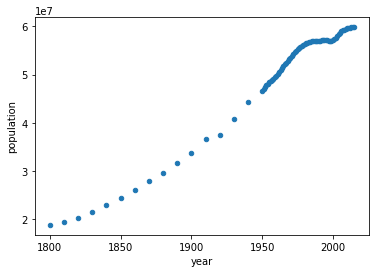

In [19]:
italy.plot.scatter("year","population")

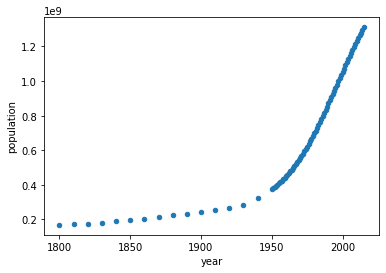

In [20]:
gapminder.query('country=="India"').plot.scatter("year","population")

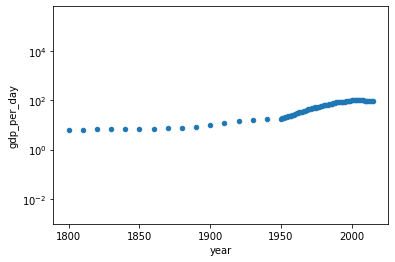

In [21]:
italy.plot.scatter("year","gdp_per_day",logy=True)

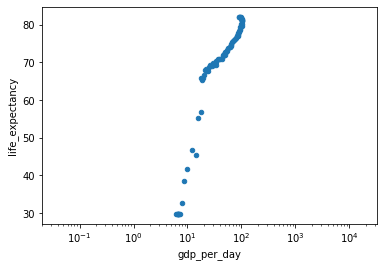

In [24]:
italy.plot.scatter("gdp_per_day","life_expectancy",logx=True)

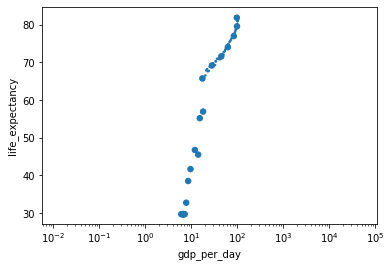

In [26]:
size = np.where(italy.year % 10 == 0,30,2)

italy.plot.scatter("gdp_per_day","life_expectancy",logx=True,s=size)

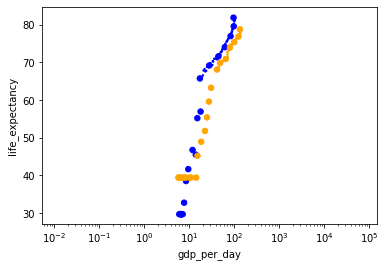

In [28]:
data = gapminder.query('(country == "Italy") or (country == "United States")')
size = np.where(data.year % 10 == 0,30,2)
color = np.where(data.country == 'Italy','blue','orange')
data.plot.scatter("gdp_per_day", "life_expectancy", logx=True, s=size, c=color)

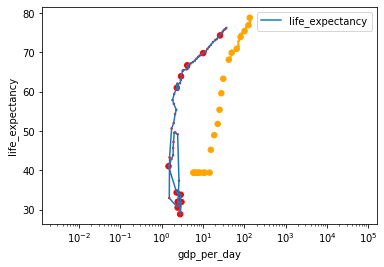

In [30]:
data = gapminder.query('(country == "China") or (country == "United States")')

size = np.where(data.year % 10 == 0,30,2)
color = np.where(data.country == 'China','red','orange')

ax = data.plot.scatter("gdp_per_day","life_expectancy", logx=True, s=size, c=color)

data[data.country == 'China'].plot.line(x='gdp_per_day',y='life_expectancy',ax=ax)

In [6]:
import numpy as np
import scipy.stats
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp
import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

import re
import mailbox
import csv

In [4]:
gapminder = pd.read_csv('gapminder.csv')
gapminder

,country,year,region,population,life_expectancy,age5_surviving,babies_per_woman,gdp_per_capita,gdp_per_day
0,Afghanistan,1800,Asia,3280000,28.21,53.142,7.00,603,1.650924
1,Afghanistan,1810,Asia,3280000,28.11,53.002,7.00,604,1.653662
2,Afghanistan,1820,Asia,3323519,28.01,52.862,7.00,604,1.653662
3,Afghanistan,1830,Asia,3448982,27.90,52.719,7.00,625,1.711157
4,Afghanistan,1840,Asia,3625022,27.80,52.576,7.00,647,1.771389
...,...,...,...,...,...,...,...,...,...
14735,Zimbabwe,2011,Africa,14255592,51.60,90.800,3.64,1626,4.451745
14736,Zimbabwe,2012,Africa,14565482,54.20,91.330,3.56,1750,4.791239
14737,Zimbabwe,2013,Africa,14898092,55.70,91.670,3.49,1773,4.854209
14738,Zimbabwe,2014,Africa,15245855,57.00,91.900,3.41,1773,4.854209


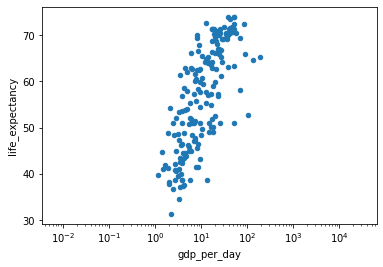

In [8]:
def plotyear(year):
    data = gapminder[gapminder.year == year]
    
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True)

plotyear(1965)

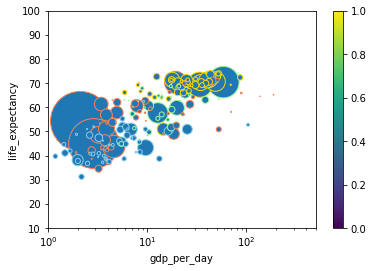

In [26]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population',ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa':'skyblue','Europe':'gold','America':'palegreen','Asia':'coral'})
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True,
                     s=area, colormap=matplotlib.cm.get_cmap('Purples_r'),vmin=55, vmax=100,
                      linewidths=1, edgecolors=edgecolor, sharex=False)
    pp.axis(xmin=1,xmax=500,ymin=10,ymax=100)
plotyear(1965)

In [28]:
interact(plotyear,year=range(1965,2016,10))

interactive(children=(Dropdown(description='year', options=(1965, 1975, 1985, 1995, 2005, 2015), value=1965), …

<function __main__.plotyear(year)>

In [29]:
gapminder[gapminder.year == 2015].population.sum()

7292414176

In [30]:
gapminder[gapminder.year == 2015].groupby('region').population.sum()

region
Africa     1172160800
America     986577100
Asia       4299141788
Europe      834534488
Name: population, dtype: int64

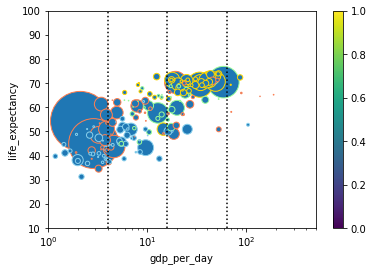

In [31]:
def plotyear(year):
    data = gapminder[gapminder.year == year].sort_values('population',ascending=False)
    area = 5e-6 * data.population
    color = data.age5_surviving
    edgecolor = data.region.map({'Africa':'skyblue','Europe':'gold','America':'palegreen','Asia':'coral'})
    data.plot.scatter('gdp_per_day','life_expectancy',logx=True,
                     s=area, colormap=matplotlib.cm.get_cmap('Purples_r'),vmin=55, vmax=100,
                      linewidths=1, edgecolors=edgecolor, sharex=False)
    for level in (4,16,64):
        pp.axvline(level,linestyle=':',color='k')
    pp.axis(xmin=1,xmax=500,ymin=10,ymax=100)
plotyear(1965)

In [36]:
data = gapminder.loc[gapminder.year == 2015,['gdp_per_day','life_expectancy','age5_surviving','babies_per_woman']]
pandas.plotting.scatter_matrix(data,figsize(9,9))

NameError: name 'figsize' is not defined

In [37]:
import numpy as np
import scipy.stats
import pandas as pd

import matplotlib
import matplotlib.pyplot as pp
import pandas.plotting

from IPython import display
from ipywidgets import interact, widgets

%matplotlib inline

import re
import mailbox
import csv

In [38]:
smoking = pd.read_csv('whickham.csv')

In [39]:
smoking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1314 entries, 0 to 1313
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   outcome  1314 non-null   object
 1   smoker   1314 non-null   object
 2   age      1314 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 30.9+ KB


In [40]:
smoking.head()

,outcome,smoker,age
0,Alive,Yes,23
1,Alive,Yes,18
2,Dead,Yes,71
3,Alive,No,67
4,Alive,No,64


In [41]:
pd.DataFrame(smoking.smoker.value_counts())

,smoker
No,732
Yes,582


In [42]:
pd.DataFrame(smoking.outcome.value_counts())

,outcome
Alive,945
Dead,369


In [43]:
pd.DataFrame(smoking.outcome.value_counts(normalize=True))

,outcome
Alive,0.719178
Dead,0.280822


In [44]:
bysmoker = smoking.groupby("smoker").outcome.value_counts(normalize=True)
bysmoker

smoker  outcome
No      Alive      0.685792
        Dead       0.314208
Yes     Alive      0.761168
        Dead       0.238832
Name: outcome, dtype: float64

In [45]:
bysmoker.index

MultiIndex([( 'No', 'Alive'),
            ( 'No',  'Dead'),
            ('Yes', 'Alive'),
            ('Yes',  'Dead')],
           names=['smoker', 'outcome'])

In [46]:
bysmoker.unstack()

outcome,Alive,Dead
smoker,,
No,0.685792,0.314208
Yes,0.761168,0.238832


In [47]:
smoking['ageGroup'] = pd.cut(smoking.age,[0,30,40,53,64],labels=['0-30','30-40','40-53','53-64'])

In [48]:
smoking['ageGroup'].head()

0     0-30
1     0-30
2      NaN
3      NaN
4    53-64
Name: ageGroup, dtype: category
Categories (4, object): [0-30 < 30-40 < 40-53 < 53-64]

In [51]:
smoking['ageGroup'].head()

0     0-30
1     0-30
2      NaN
3      NaN
4    53-64
Name: ageGroup, dtype: category
Categories (4, object): [0-30 < 30-40 < 40-53 < 53-64]

In [50]:
smoking['age'].head()

0    23
1    18
2    71
3    67
4    64
Name: age, dtype: int64

In [52]:
byyage = smoking.groupby(['ageGroup','smoker']).outcome.value_counts(normalize=True)

In [54]:
byyage.unstack().drop("Dead",axis=1)

outcome             Alive
ageGroup smoker          
0-30     No      0.981818
         Yes     0.975610
30-40    No      0.955224
         Yes     0.940678
40-53    No      0.876106
         Yes     0.802395
53-64    No      0.669291
         Yes     0.580645

In [56]:
bysmoker


smoker  outcome
No      Alive      0.685792
        Dead       0.314208
Yes     Alive      0.761168
        Dead       0.238832
Name: outcome, dtype: float64

In [57]:
byyage

ageGroup  smoker  outcome
0-30      No      Alive      0.981818
                  Dead       0.018182
          Yes     Alive      0.975610
                  Dead       0.024390
30-40     No      Alive      0.955224
                  Dead       0.044776
          Yes     Alive      0.940678
                  Dead       0.059322
40-53     No      Alive      0.876106
                  Dead       0.123894
          Yes     Alive      0.802395
                  Dead       0.197605
53-64     No      Alive      0.669291
                  Dead       0.330709
          Yes     Alive      0.580645
                  Dead       0.419355
Name: outcome, dtype: float64

Text(0.5, 1.0, 'smoker')

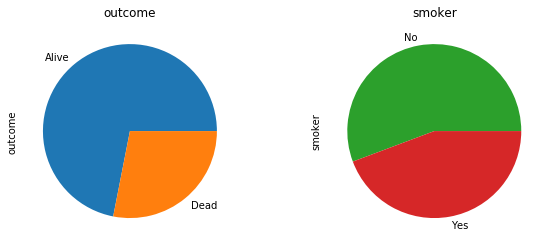

In [60]:
pp.figure(figsize=(10,4))
pp.subplot(1,2,1);smoking.outcome.value_counts().plot(kind='pie',colors=['C0','C1']); pp.title('outcome')
pp.subplot(1,2,2);smoking.smoker.value_counts().plot(kind='pie',colors=['C2','C3']);pp.title('smoker')

In [61]:
bysmoker

smoker  outcome
No      Alive      0.685792
        Dead       0.314208
Yes     Alive      0.761168
        Dead       0.238832
Name: outcome, dtype: float64

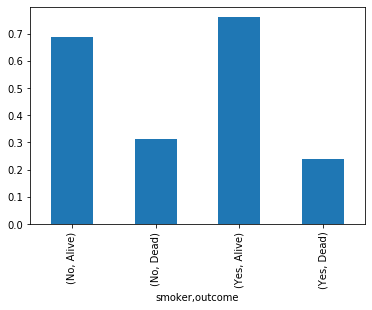

In [62]:
bysmoker.plot(kind='bar')

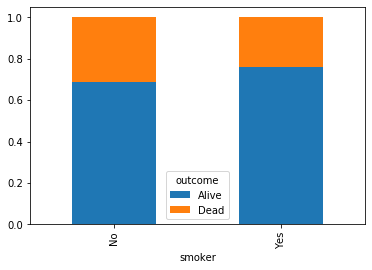

In [63]:
bysmoker.unstack().plot(kind='bar',stacked=True)

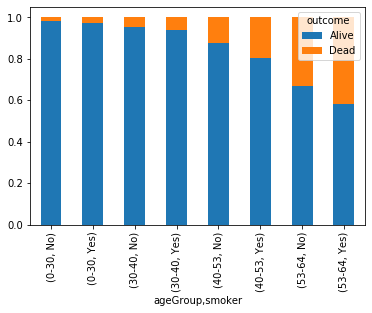

In [64]:
byyage.unstack().plot(kind='bar',stacked=True)

In [66]:
byyage.unstack().drop("Dead",axis=1).unstack()

outcome      Alive          
smoker          No       Yes
ageGroup                    
0-30      0.981818  0.975610
30-40     0.955224  0.940678
40-53     0.876106  0.802395
53-64     0.669291  0.580645

In [67]:
byage2 = byyage.unstack().drop("Dead",axis=1).unstack()

byage2.columns =["No","Yes"]
byage2.columns.name = "smoker"

In [68]:
byage2

smoker,No,Yes
ageGroup,,
0-30,0.981818,0.975610
30-40,0.955224,0.940678
40-53,0.876106,0.802395
53-64,0.669291,0.580645


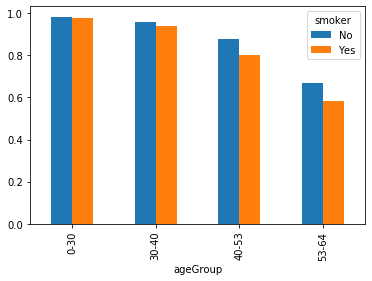

In [69]:
byage2.plot(kind='bar')